In [1]:
from portfolio.acct import TradingAcct, accountSetup
from portfolio.pos import Position

In [2]:
# Init Account with Alpaca data
trade_account = accountSetup()
if trade_account is None: 
    print("Error in account setup") 

In [3]:
position_data = trade_account.positions.get('SPY').history
position_data.head()

,open,high,low,close,volume,year,month,day
0,323.54,324.89,322.53,324.87,60187033.0,2020,1,2
1,321.16,323.64,321.10,322.43,80319689.0,2020,1,3
2,320.49,323.73,320.36,323.73,56672077.0,2020,1,6
3,323.02,323.54,322.24,322.74,43646563.0,2020,1,7
4,322.94,325.78,322.67,324.42,69691471.0,2020,1,8


In [4]:
position_data['target'] = position_data['close'].shift(-1)
position_data.dropna(inplace=True)  # Drop the last row (no future price)

X = position_data.drop(columns=['target','close'])
y = position_data['target']

In [5]:
from sklearn.preprocessing import StandardScaler
# import pandas as pd

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Test train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
# create best model for stock price prediction, predicting the closing price
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=20, random_state=42, max_depth=7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Save the model
# import joblib
# joblib.dump(model, 'stock_price_model.pkl')
# # Load the model
# loaded_model = joblib.load('stock_price_model.pkl')


In [8]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 37.5462551082988
R^2 Score: 0.9945257814369591


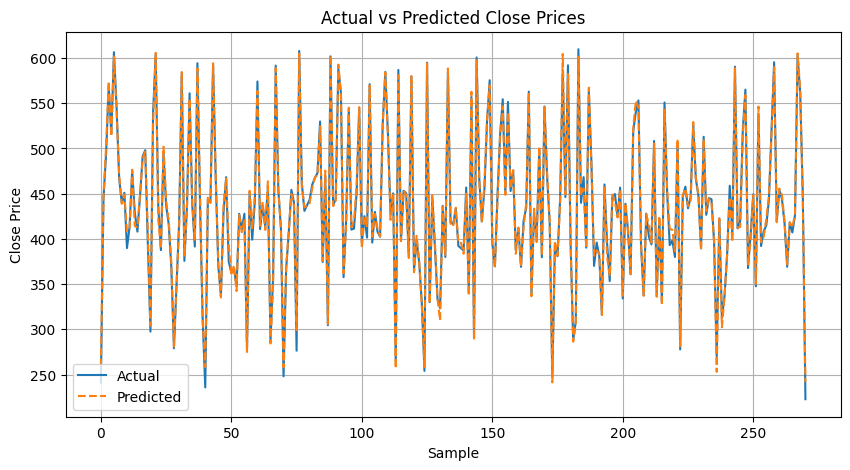

In [9]:
# plot predictions
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred, label="Predicted", linestyle='--')
plt.title("Actual vs Predicted Close Prices")
plt.xlabel("Sample")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()



In [15]:
latest_data = X.iloc[-1:].copy()  # last row
print(latest_data)
print(position_data.iloc[-2:])
new_data_scaled = scaler.transform(latest_data)

tomorrow_pred = model.predict(latest_data)[0]
print(f"Predicted close price for tomorrow: ${tomorrow_pred:.2f}")


        open    high     low      volume  year  month  day
1353  588.44  592.58  581.82  95197657.0  2025      5   21
        open    high     low   close      volume  year  month  day  target
1352  593.09  594.05  589.60  592.85  60614492.0  2025      5   20  582.86
1353  588.44  592.58  581.82  582.86  95197657.0  2025      5   21  583.09
Predicted close price for tomorrow: $604.00


c:\Users\cgarv\automatic-fishstick\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
